In [58]:
%load_ext autoreload
%autoreload 2

from datasets import *
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
# Import and time synthetic data
X, y = import_synthetic()

In [60]:
# Time how long it takes to import synthetic data
%timeit import_synthetic()

466 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
# Get dataset length
len(X), len(y)

(1200, 1200)

In [69]:
# Set dataset number
DSN = 90

In [70]:
X[DSN].head()

,case,step,susceptible,c_infected,recovered,dead
32897,BA-4-400015,0,3993,7,0,0
32898,BA-4-400015,1,3991,9,0,0
32899,BA-4-400015,2,3991,9,0,0
32900,BA-4-400015,3,3991,9,1,0
32901,BA-4-400015,4,3991,9,1,0


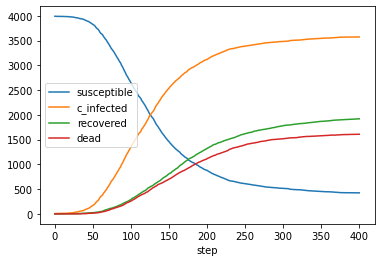

case                BA-4-400015
population                 4000
initial_infected              7
infectiousness         0.112404
i_out                  0.217567
i_rec_prop             0.545363
network                      BA
k                             4
Name: 90, dtype: object

In [75]:
# Plot time series data
ax_x = 'step'
ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
df = X[DSN][[ax_x] + ax_y]
df.plot(x=ax_x)
plt.show()

# Show features
y.iloc[DSN]

In [73]:
# Format X[DSN] and y[DSN] as ndarrays (to be passed to machine learning library)
Xt, yt = synthetic_numpy(X, y)

Xt[DSN], yt[DSN], Xt[DSN].dtype, yt[DSN].dtype

(array([[   0, 3993,    7,    0,    0],
        [   1, 3991,    9,    0,    0],
        [   2, 3991,    9,    0,    0],
        ...,
        [ 398,  426, 3574, 1920, 1609],
        [ 399,  425, 3575, 1921, 1609],
        [ 400,  425, 3575, 1921, 1609]]),
 array([3.        , 2.        , 0.11240377, 0.21756687, 0.54536277,
        0.        , 0.        ]),
 dtype('int64'),
 dtype('float64'))

In [67]:
# Time how long synthetic_numpy takes
%timeit synthetic_numpy(X, y)

183 ms ± 5.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
# Time how long it takes to iterate through whole dataset
%timeit for x, y in zip(Xt, yt): pass

185 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
